<a href="https://colab.research.google.com/github/tuananhnguyen512/AI2023_class/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import các thư viện
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
#load file ảnh từ ggdrive đặt tên 
Pic ='/content/drive/MyDrive/Picture/MoneyVN/'
photos,labels = list(),list()

In [ ]:
#gán nhãn cho các giá trị tiền
for file in listdir(Pic):
  output = 0.0
  if file.startswith('5k'):
    output = 1.0
  if file.startswith('10k'):
    output = 2.0
  if file.startswith('20k'):
    output = 3.0
  if file.startswith('50k'):
    output = 4.0 
  if file.startswith('100k'):
    output = 5.0
  if file.startswith('500k'):
    output = 6.0
  photo = load_img(Pic+file, target_size = (60,30))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
  
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(332, 60, 30, 3) (332,)


In [ ]:
#lưu dữ liệu sau khi đã sử lí vào ggdrive
save('/content/drive/MyDrive/Pic_train/VN_photos.npy',photos)
save('/content/drive/MyDrive/Pic_train/VN_labels.npy',labels)

In [ ]:
#lấy dữ liệu để sử dụng
photos = np.load('/content/drive/MyDrive/Pic_train/VN_photos.npy')
labels = np.load('/content/drive/MyDrive/Pic_train/VN_labels.npy')

In [ ]:
# Import các thư viện
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy

In [ ]:
x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=7)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(60, 30, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 15, epochs = 12, verbose = 1)

Epoch 1/12
23/23 [==============================] - 2s 74ms/step - loss: 1.8116 - accuracy: 0.2560
Epoch 2/12
23/23 [==============================] - 3s 118ms/step - loss: 1.6155 - accuracy: 0.3313
Epoch 3/12
23/23 [==============================] - 3s 127ms/step - loss: 1.5305 - accuracy: 0.3554
Epoch 4/12
23/23 [==============================] - 2s 74ms/step - loss: 1.3531 - accuracy: 0.4307
Epoch 5/12
23/23 [==============================] - 2s 75ms/step - loss: 1.1728 - accuracy: 0.5241
Epoch 6/12
23/23 [==============================] - 2s 75ms/step - loss: 1.2114 - accuracy: 0.5301
Epoch 7/12
23/23 [==============================] - 2s 73ms/step - loss: 0.9628 - accuracy: 0.6235
Epoch 8/12
23/23 [==============================] - 2s 72ms/step - loss: 0.8779 - accuracy: 0.6506
Epoch 9/12
23/23 [==============================] - 2s 80ms/step - loss: 0.8676 - accuracy: 0.6837
Epoch 10/12
23/23 [==============================] - 3s 127ms/step - loss: 0.7322 - accuracy: 0.7108
Epoch 

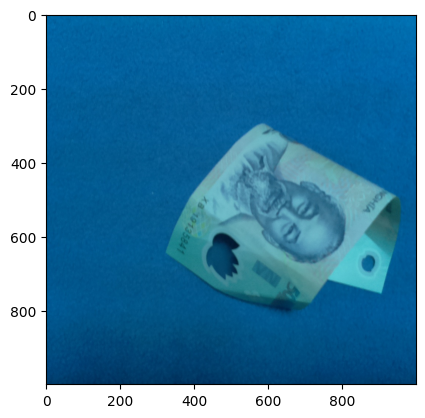

1/1 [==============================] - 0s 28ms/step
1
menh gia: 5k


In [ ]:

 image= Image.open('/content/drive/MyDrive/Pic_test/moneyvn_test/8.jpg')

# chỉnh ảnh về kích thước mong muốn
IMAGE = image
image = image.resize((60,30))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(image)
img = img.reshape(1,60,30,3)
img = img.astype('float32') / 255.0

plt.imshow(IMAGE)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["khong biet ","5k", "10k","20k","50k ","100k","500k"]
temp1 = matrix[0]
print(temp1)
print("menh gia:", class_names[temp1])

In [ ]:
model.save('/content/drive/MyDrive/Model_Trained/Vn_banknotes_train.h5')